## Forecasting NBA Player Outcomes for the 2018-19 Season Based off Previous Players

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.spatial.distance import cdist
from numpy.linalg import inv
from sklearn.kernel_ridge import KernelRidge
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pandas.plotting import scatter_matrix
from IPython.display import display
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pymc3 as pm
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

/Users/Sachin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
all_player_df = pd.read_csv('all_player_stats.csv')
all_player_df = all_player_df.fillna(0)
all_player_df = all_player_df.sort_values('Player')
all_player_df['PPG'] = all_player_df['PPG'].round(2)

unique_names = all_player_df.Player.unique()

df_dict = {elem : all_player_df for elem in unique_names}

for key in df_dict.keys():
    df_dict[key] = all_player_df[:][all_player_df.Player == key]


for player in df_dict:
    df_dict[player] = df_dict[player].sort_values('Year')
    cols = ['Player', 'Year','G','PPG']
    df_dict[player] = df_dict[player][cols]
    df_dict[player] = df_dict[player].reset_index()
    

df_dict['Kobe Bryant']
# names = all_player_df.drop_duplicates('Player')
# names = names['Player']

,index,Player,Year,G,PPG
0,5672,Kobe Bryant,1997,71,7.59
1,6250,Kobe Bryant,1998,79,15.44
2,6791,Kobe Bryant,1999,50,19.92
3,7306,Kobe Bryant,2000,66,22.50
4,7796,Kobe Bryant,2001,68,28.50
5,8345,Kobe Bryant,2002,80,25.24
6,8836,Kobe Bryant,2003,82,30.01
7,9341,Kobe Bryant,2004,65,23.95
8,9923,Kobe Bryant,2005,66,27.56
9,10505,Kobe Bryant,2006,80,35.40


In [3]:
## 2019 data here!
player_dat_2014 = []

for i in range(26):
    df = pd.DataFrame()
    df = pd.read_csv('2014-draft-class/player{}.csv'.format(i))
    df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)
    player_dat_2014.append(df)
    
player_dat_2014[24].head()

,G,Date,Age,Opp,GS,MP,FG,FGA,FG_Perc,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2015,20,74.33,0,3,1,1,1.000,0,...,0,0,0,0,0,1,0,2,0.7,1
1,2,2015,20,89.27,0,18,5,8,0.625,0,...,6,9,1,0,0,2,3,10,7.8,10
2,3,2015,20,51.92,0,24,4,9,0.444,0,...,1,4,0,0,0,1,2,8,3.9,-2
3,4,2015,20,40.71,0,17,1,4,0.250,0,...,2,3,0,0,1,1,1,5,2.8,-6
4,5,2015,20,37.13,0,17,2,4,0.500,0,...,2,4,1,1,1,1,1,4,4.2,-5


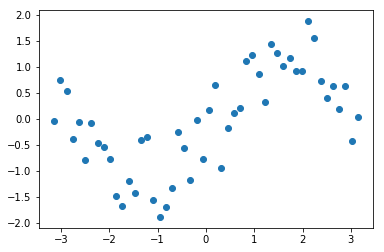

In [10]:
X = np.linspace(-np.pi,np.pi,50)
X = X.reshape(-1,1)

E = np.random.normal(0,0.5,[100,1])
Y = np.sin(X)

for i in range (len(Y)):
    Y[i] = Y[i] + E[i]
    
plt.scatter(X,Y)
plt.show()

KernelRidge(alpha=0.5, coef0=1, degree=3, gamma=1.0, kernel='rbf',
      kernel_params=None)

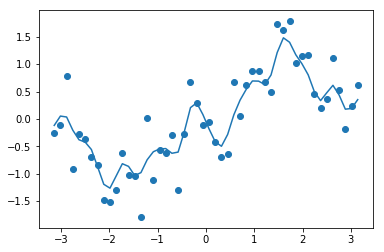

In [21]:
plt.figure(1)
X = np.linspace(-np.pi,np.pi,50)
X = X.reshape(-1,1)

E = np.random.normal(0,0.2,[100,1])
Y = np.sin(X)

for i in range (len(Y)):
    Y[i] = Y[i] + E[i]
plt.figure(2)
X = np.linspace(-np.pi,np.pi,50)
X = X.reshape(-1,1)

E = np.random.normal(0,0.5,[100,1])
Y = np.sin(X)

for i in range (len(Y)):
    Y[i] = Y[i] + E[i]
    
krr_clf = KernelRidge(alpha=0.5, kernel='rbf', gamma=12.0, degree=3, coef0=1, kernel_params=None)
plt.scatter(X,Y)
f = krr_clf.fit(X,Y)
p = f.predict(X)
plt.plot(X,p)
plt.savefig('overfit.png')
plt.show()